# Normal Modes of CO<sub>2</sub> Vibration

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg
from IPython.display import HTML
from tools import create_animation
%config InlineBackend.figure_format = 'svg'

### (1) Define coefficient matrix

In [6]:
N = 3
M = np.array([
    [ 1, -1,  0],
    [-1,  2, -1],
    [ 0, -1,  1],
])
print(M.shape)
print(M)

(3, 3)
[[ 1 -1  0]
 [-1  2 -1]
 [ 0 -1  1]]


### (2) Solve eigenvalue problem

- The eigenvalue is related to the angular frequency.
- The eigenvector is related to the position shift of each atom.

In [7]:
eigenvalue, eigenvector = linalg.eigh(M)

In [8]:
print(eigenvalue) # print all eigenvalue

[2.66453526e-15 1.00000000e+00 3.00000000e+00]


In [10]:
print(eigenvector[:,0]) # print eigenvector of first normal mode
print(eigenvector[:,1]) # print eigenvector of second normal mode
print(eigenvector[:,2]) # print eigenvector of third normal mode

[0.57735027 0.57735027 0.57735027]
[-7.07106781e-01  9.42055475e-16  7.07106781e-01]
[-0.40824829  0.81649658 -0.40824829]


### (3) Create positions as function of time and shift at specified normal mode

In [6]:
# choose normal mode
n = 2

# position shift of n-th normal mode
xxs = eigenvector[:,n]

# frequency of n-th normal mode
w = np.sqrt(eigenvalue[n])

# positions that seperate atom from each other
xx0 = np.arange(0,N)*2

# time range
tt = np.linspace(0, 2*np.pi, 80)
xxt = np.sin(tt*w)

# position of time and shift; xx(t,s)
xxts = xx0 + np.tensordot(xxt, xxs, axes=0)

### (4) Plot trajectory and animate for each atom

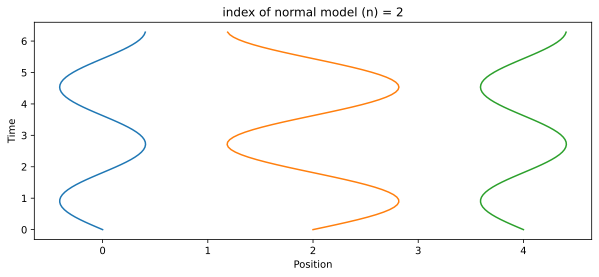

In [7]:
plt.figure(figsize=(10,4))
plt.plot(xxts[:,0], tt)
plt.plot(xxts[:,1], tt)
plt.plot(xxts[:,2], tt)
plt.title(f'index of normal model (n) = {n}')
plt.xlabel('Position')
plt.ylabel('Time')
plt.show()

In [8]:
# create animation
animation = create_animation(xxts, xlim=(-1,5))

# display animation
HTML(animation.to_jshtml(fps=30))

In [9]:
# save to gif
#animation.save('myAnimation.gif', writer='imagemagick', fps=30, dpi=150)